<a href="https://colab.research.google.com/github/hris699/TSF-Internship/blob/master/Task_3_To_Explore_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')



# Get Data

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [24]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [26]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
#Split data into features (X) & target (y)
X = df.iloc[:,0:4]
y = df.iloc[:,-1]
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


## Vizualing Data

In [28]:
# See how many samples we have of each species
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

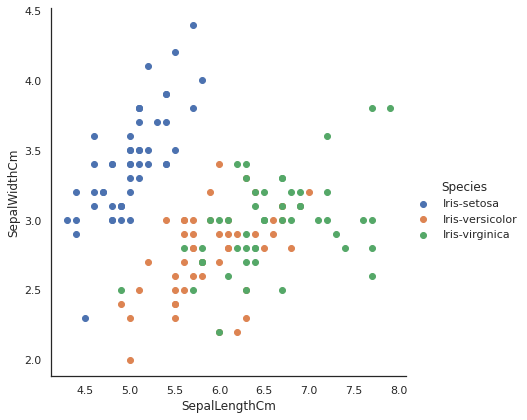

In [51]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.set(style="white", color_codes=True)
sns.FacetGrid(df, hue='Species', size=6)\
.map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
.add_legend();

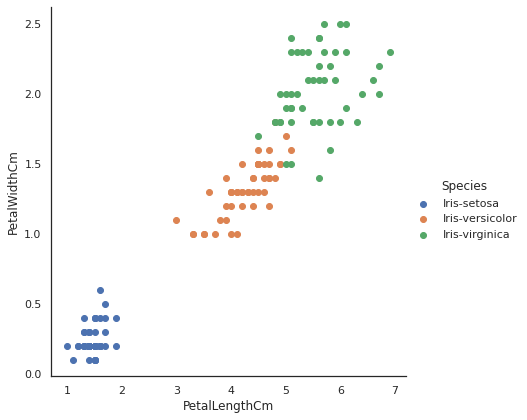

In [52]:
sns.FacetGrid(df, hue='Species', size=6)\
.map(plt.scatter, 'PetalLengthCm','PetalWidthCm') \
.add_legend();

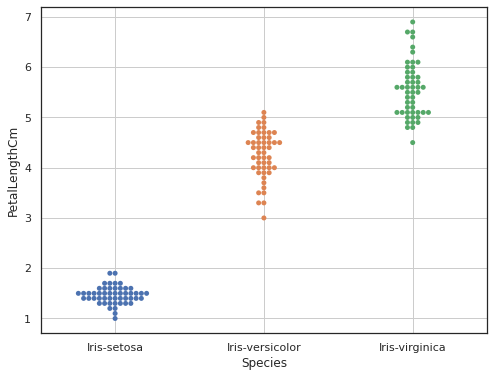

In [53]:
# petal length distributions in a swarm plot
plt.figure(figsize=(8,6))
sns.swarmplot(x='Species', y='PetalLengthCm', data=df)
plt.grid()

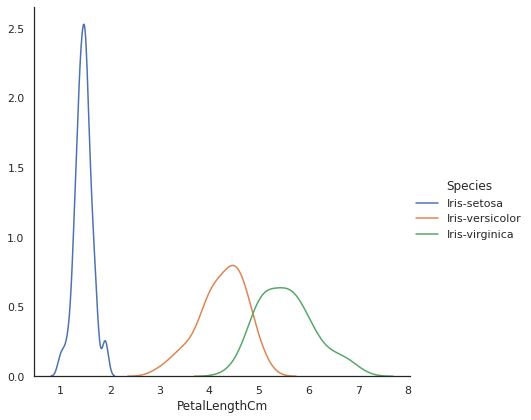

In [54]:
#  create and visualize a kernel density estimate of the underlying feature
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.show()

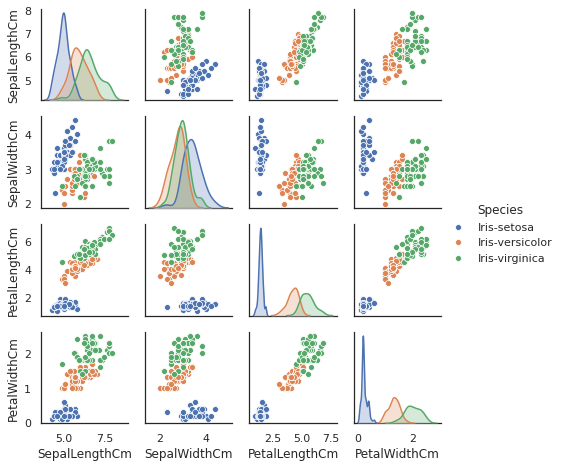

In [55]:
sns.pairplot(df, hue='Species', diag_kind='kde', size=1.6);

## Feature Scaling

In [56]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## K-Means Clustering

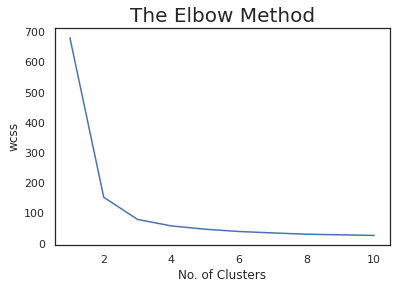

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In [64]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(X_scaled)

#predict the cluster for each datapoint
y_kmeans = km.predict(X_scaled)

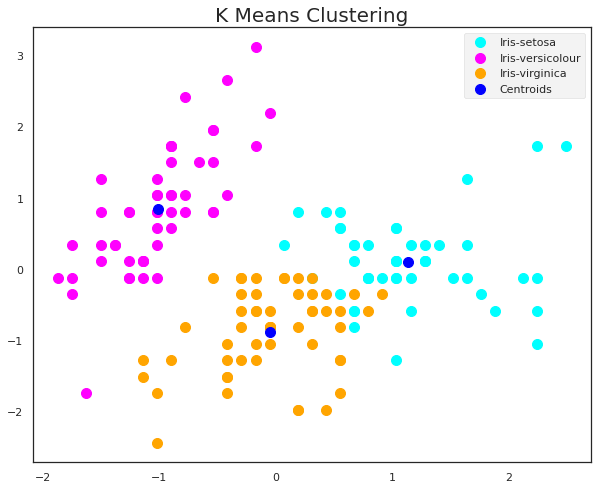

In [71]:
# Visualising the clusters - On the first two column
X_scaled = np.array(X_scaled)
plt.figure(figsize=(10,8))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], 
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], 
            s = 100, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)

plt.legend()
plt.show()

In [80]:
from sklearn import metrics
scores = metrics.silhouette_score(X_scaled, y_kmeans)
scores

0.4589717867018717

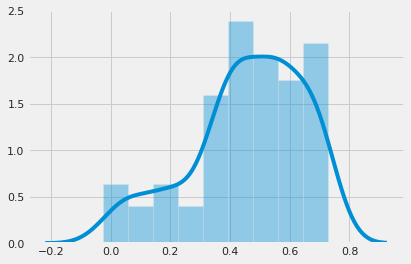

In [81]:
scores = metrics.silhouette_samples(X_scaled, y_kmeans)
sns.distplot(scores);

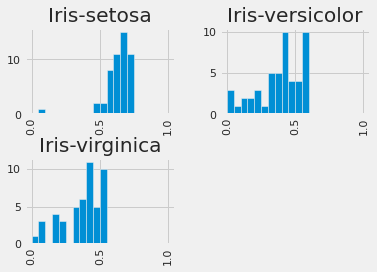

In [86]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = df['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

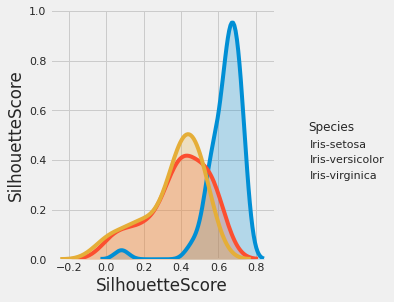

In [87]:
sns.pairplot(df_scores, hue="Species", size=4);
